0.15    3840
0.05    1936
0.10    1920
Name: fixed_cont, dtype: int64
Data for test


outliers,0 - letter,1 - email,2 - form,3 - handwritten,4 - advertisement,5 - scientific report,6 - scientific publication,7 - specification,8 - file folder,9 - news article,10 - budget,11 - invoice,12 - presentation,13 - questionnaire,14 resume,15 - memo,All
inliers,,,,,,,,,,,,,,,,,
0 - letter,NaN,0.465116,0.741729,0.978938,0.726190,0.530385,0.769778,0.978938,0.797827,0.530385,0.636057,0.915854,0.530385,0.636057,1.000000,0.465116,0.713517
1 - email,0.465116,NaN,0.595653,0.934122,0.595653,0.465116,0.915854,0.746726,0.722851,0.465116,0.465116,0.636057,0.595653,0.769778,0.943902,0.465116,0.652122
2 - form,0.465116,0.465116,NaN,0.971951,0.769778,0.701326,0.943902,0.971951,0.766594,0.636057,0.806998,0.847401,0.465116,0.766594,1.000000,0.465116,0.736201
3 - handwritten,0.595653,0.465116,0.595653,NaN,0.608676,0.564265,0.636057,0.599198,0.552578,0.465116,0.458749,0.535650,0.579959,0.660922,0.875450,0.595653,0.585913
4 - advertisement,0.463415,0.522104,0.634752,0.666600,NaN,0.463415,0.659604,0.700149,0.463415,0.460061,0.528811,0.590854,0.460061,0.509592,0.887179,0.463415,0.564895
5 - scientific report,0.465116,0.465116,0.741729,0.957875,0.636057,NaN,0.595653,0.701326,0.863095,0.465116,0.701326,0.701326,0.570788,0.664106,0.748716,0.465116,0.649497
6 - scientific publication,0.636057,0.701326,0.931548,0.885011,0.847401,0.530385,NaN,0.943902,0.903499,0.465116,0.866279,0.915854,0.726190,0.887805,0.931548,0.595653,0.784505
7 - specification,0.465116,0.530385,0.726190,0.957875,0.461932,0.465116,0.835046,NaN,0.735206,0.465116,0.530385,0.726190,0.636057,0.530385,1.000000,0.530385,0.639692
8 - file folder,0.411064,0.337566,0.400075,0.451852,0.508793,0.383704,0.482869,0.423810,NaN,0.427513,0.437037,0.404672,0.350034,0.425185,0.376630,0.364093,0.412326


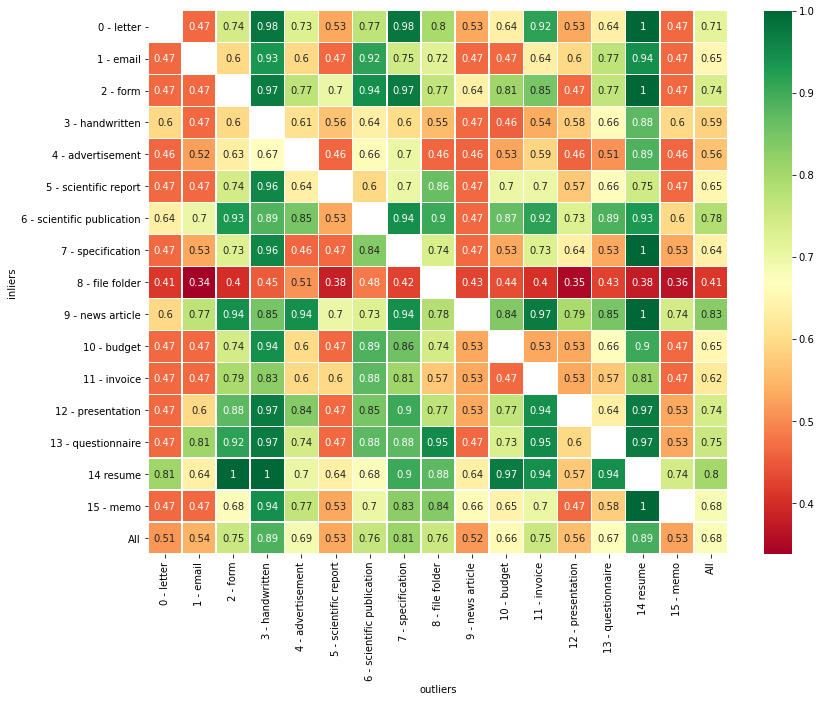

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from natsort import natsorted, order_by_index, index_natsorted
%matplotlib inline

plt.figure(figsize=(13, 10))
data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

files = ["/home/philipp/projects/dad4td/reports/semisupervised/sup_combs_rvl_0004.tsv", 
         "/home/philipp/projects/dad4td/reports/semisupervised/semisup_rvl_pw_0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)

print(df.fixed_cont.value_counts())
remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}
df[inliers] = df[inliers].map(lambda x: int(x.strip("[]")))
df[outliers] = df[outliers].map(lambda x: int(x.strip("[]")))
df = df.replace({"inliers":remap, "outliers":remap})

df = df.where(df.data == data).dropna()
df = df.where(df.labeled_data == 1.0).dropna()

df = df[[score, inliers, outliers]]
df = df.pivot_table(columns=outliers, index=inliers, values=score, margins=True)

df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.reindex(natsorted(df.columns), axis=1)

print(f"Data for {data}")
fig = sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True).get_figure()
fig.savefig('/home/philipp/projects/dad4td/thesis/pictures/1on1.svg')


df

Data for test


outliers,0 - letter,1 - email,2 - form,3 - handwritten,4 - advertisement,5 - scientific report,6 - scientific publication,7 - specification,8 - file folder,9 - news article,10 - budget,11 - invoice,12 - presentation,13 - questionnaire,14 resume,15 - memo,All
inliers,,,,,,,,,,,,,,,,,
0 - letter,NaN,0.014795,-0.326814,-0.514777,-0.236458,-0.041693,-0.260325,-0.404314,-0.211736,-0.042482,-0.067263,-0.471937,-0.034959,-0.075099,-0.014414,0.032109,-0.177024
1 - email,-0.005921,NaN,-0.133156,-0.494257,-0.082980,0.077169,-0.446781,-0.251339,-0.258873,-0.021258,0.032750,-0.111336,-0.046002,-0.205357,-0.520350,-0.029681,-0.166492
2 - form,-0.047998,-0.029164,NaN,-0.414192,-0.297021,-0.065626,-0.264109,-0.445326,-0.111057,-0.065650,-0.331747,-0.394423,0.012551,-0.140153,-0.160076,-0.029512,-0.185567
3 - handwritten,-0.129302,0.002727,-0.130808,NaN,-0.154605,-0.100942,-0.172721,-0.135874,0.031704,0.030757,0.038634,-0.036188,-0.116645,-0.197608,-0.379577,-0.132330,-0.105519
4 - advertisement,0.000562,-0.055170,-0.160569,-0.201137,NaN,-0.027342,-0.192670,-0.234685,0.114111,0.005402,-0.066337,-0.131390,0.000916,-0.048615,-0.420246,0.002049,-0.094342
5 - scientific report,0.034228,0.082743,-0.303658,-0.431059,-0.196931,NaN,-0.065921,-0.107653,-0.378864,0.001957,-0.172105,-0.235437,-0.075824,-0.183948,-0.307311,-0.030317,-0.158007
6 - scientific publication,-0.196088,-0.254656,-0.335802,-0.313209,-0.407486,-0.071337,NaN,-0.297236,-0.049653,0.020081,-0.242859,-0.340713,-0.250775,-0.456588,-0.493522,-0.052048,-0.249459
7 - specification,-0.033948,-0.095315,-0.307193,-0.540460,-0.054142,-0.030306,-0.407061,NaN,-0.199452,-0.047695,-0.099101,-0.294961,-0.204827,-0.097151,-0.582579,-0.127548,-0.208116
8 - file folder,0.014558,0.070162,0.001413,-0.042359,-0.101140,0.055316,-0.075140,-0.022321,NaN,-0.015803,-0.044313,0.007037,0.069801,-0.005350,0.035080,0.047617,-0.000363


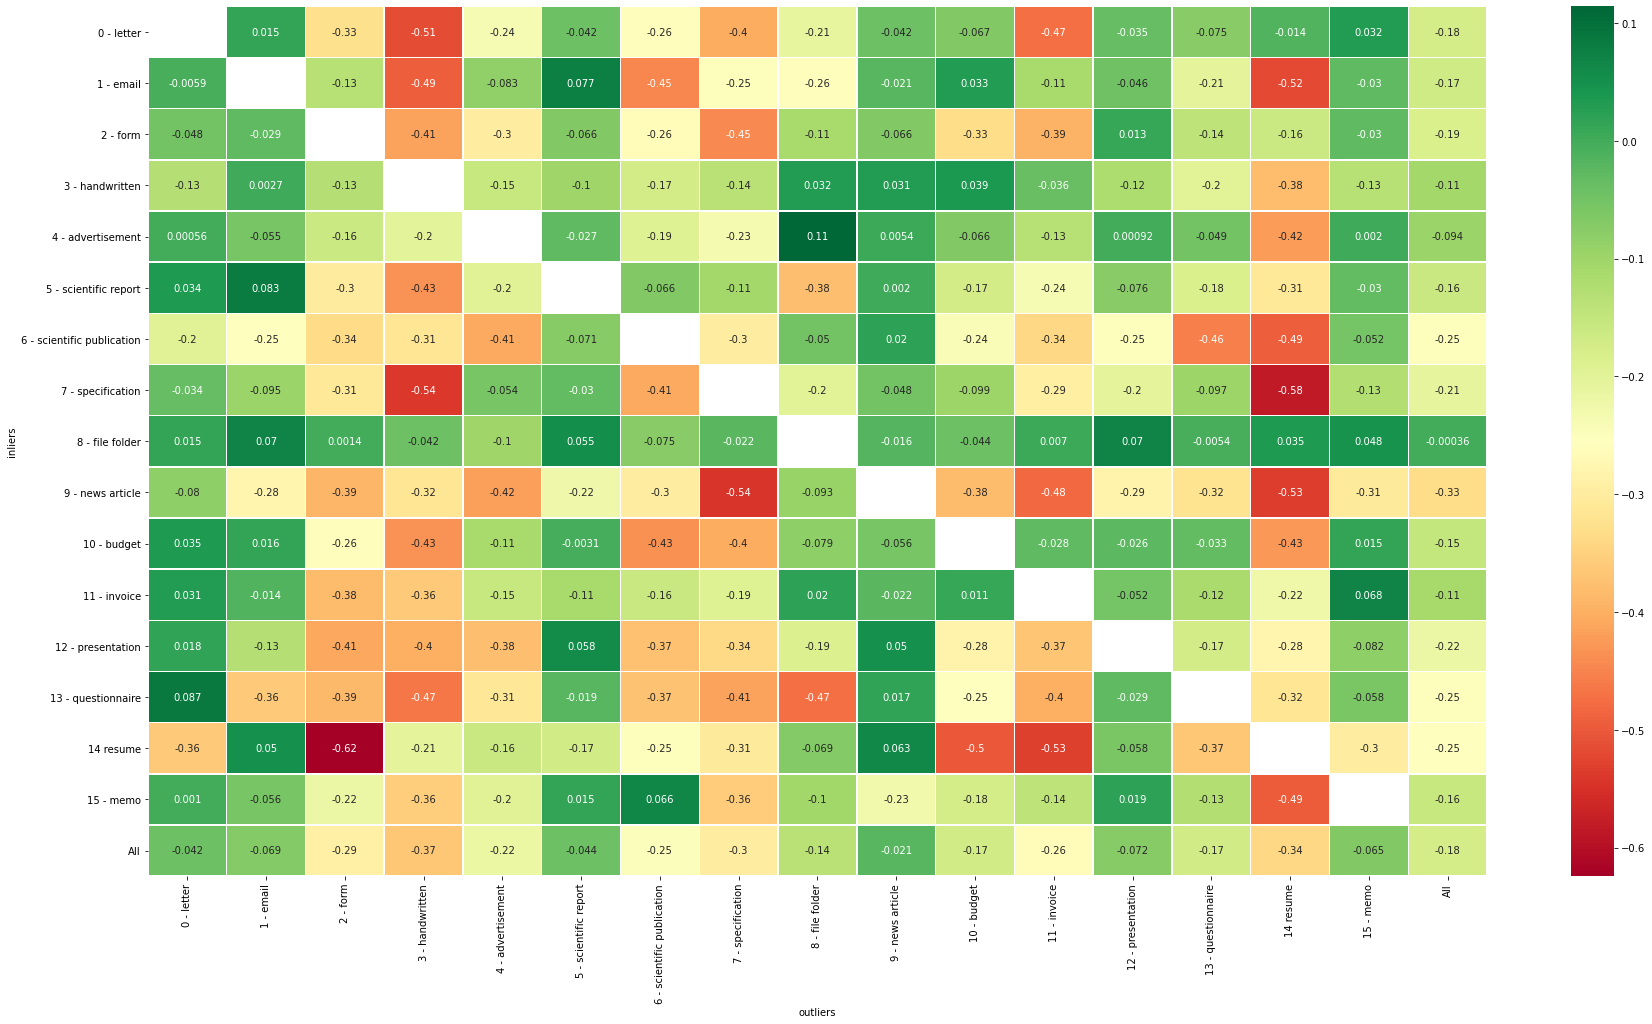

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,16))
data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

files = ["/home/philipp/projects/dad4td/reports/semisupervised/sup_combs_rvl_0004.tsv", 
         "/home/philipp/projects/dad4td/reports/semisupervised/semisup_rvl_pw_0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)


df[inliers] = df[inliers].map(lambda x: int(x.strip("[]")))
df[outliers] = df[outliers].map(lambda x: int(x.strip("[]")))
df = df.replace({"inliers":remap, "outliers":remap})

df = df.where(df.data == data).dropna()
df_semi = df.where(df.labeled_data == 0.5).dropna()[[score, inliers, outliers]]
df_super = df.where(df.labeled_data == 1.0).dropna()[[score, inliers, outliers]]

df_semi = df_semi.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
df_super = df_super.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
df = df_semi - df_super

df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.reindex(natsorted(df.columns), axis=1)

print(f"Data for {data}")
sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True)
df

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
%matplotlib inline

plt.figure(figsize=(300,160))

score_cols = ['f1_macro',
              'in_f1',
              'in_prec',
              'in_rec',
              'out_f1',
              'out_prec',
              'out_rec'
             ]

data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

files = ["/home/philipp/projects/dad4td/reports/supervised/big_test_new_test_min_len_50.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)

df = df.where(df.data == data).dropna()

groupcols = ["fixed_cont", "n_class", "n_oe"]
df = df.groupby(groupcols).mean()[score_cols]
df = df.round(2)
#print(tabulate(df, df.columns, tablefmt="rst"))
df

f1_macro  in_f1  in_prec  in_rec  out_f1  \
fixed_cont n_class n_oe                                                
0.05       250.0   0.0          0.22   0.44     0.28    1.00    0.00   
                   50.0         0.22   0.44     0.28    1.00    0.01   
                   500.0        0.28   0.45     0.29    0.99    0.12   
                   2000.0       0.34   0.46     0.30    0.98    0.21   
                   10000.0      0.39   0.47     0.31    0.94    0.32   
           1500.0  0.0          0.31   0.46     0.30    1.00    0.16   
                   50.0         0.33   0.46     0.30    1.00    0.20   
                   500.0        0.34   0.47     0.30    1.00    0.21   
                   2000.0       0.36   0.47     0.31    0.99    0.25   
                   10000.0      0.38   0.48     0.31    0.98    0.29   
           7500.0  0.0          0.42   0.49     0.33    1.00    0.35   
                   50.0         0.41   0.49     0.32    1.00    0.33   
                   500.0        0.42   0.49     0.33    1.00    0.35   
                   2000.0       0.42   0.49     0.33    1.00    0.35   
                   10000.0      0.43   0.50     0.33    0.99    0.37   
           20000.0 0.0          0.46   0.51     0.34    1.00    0.41   
                   50.0         0.46   0.51     0.34    1.00    0.41   
                   500.0        0.46   0.51     0.34    1.00    0.42   
                   2000.0       0.46   0.51     0.34    1.00    0.41   
                   10000.0      0.47   0.51     0.34    0.99    0.42   
0.10       250.0   0.0          0.25   0.44     0.28    1.00    0.06   
                   50.0         0.26   0.44     0.29    1.00    0.07   
                   500.0        0.32   0.46     0.30    0.99    0.19   
                   2000.0       0.35   0.46     0.30    0.98    0.23   
                   10000.0      0.42   0.48     0.32    0.94    0.36   
           1500.0  0.0          0.43   0.50     0.33    0.99    0.37   
                   50.0         0.44   0.50     0.33    0.99    0.38   
                   500.0        0.45   0.50     0.34    0.99    0.39   
                   2000.0       0.46   0.51     0.34    0.98    0.42   
                   10000.0      0.46   0.50     0.34    0.98    0.42   
           7500.0  0.0          0.53   0.54     0.37    0.99    0.53   
                   50.0         0.53   0.54     0.37    0.99    0.52   
                   500.0        0.54   0.54     0.37    0.99    0.53   
                   2000.0       0.48   0.52     0.36    0.99    0.44   
                   10000.0      0.54   0.54     0.37    0.98    0.53   
           20000.0 0.0          0.56   0.55     0.39    0.99    0.57   
                   50.0         0.56   0.55     0.39    0.98    0.56   
                   500.0        0.56   0.56     0.39    0.99    0.57   
                   2000.0       0.56   0.55     0.38    0.98    0.56   
                   10000.0      0.56   0.56     0.39    0.98    0.57   
0.20       250.0   0.0          0.42   0.49     0.33    0.99    0.34   
                   50.0         0.39   0.48     0.32    0.99    0.29   
                   500.0        0.45   0.50     0.34    0.98    0.40   
                   2000.0       0.46   0.50     0.34    0.97    0.42   
                   10000.0      0.50   0.51     0.35    0.93    0.48   
           1500.0  0.0          0.61   0.58     0.41    0.96    0.63   
                   50.0         0.60   0.57     0.41    0.96    0.63   
                   500.0        0.60   0.57     0.41    0.96    0.63   
                   2000.0       0.59   0.57     0.40    0.96    0.62   
                   10000.0      0.60   0.57     0.41    0.95    0.63   
           7500.0  0.0          0.66   0.61     0.45    0.95    0.70   
                   50.0         0.66   0.62     0.46    0.95    0.71   
                   500.0        0.66   0.61     0.45    0.95    0.71   
                   2000.0       0.66   0.61     0.45    0.95    0.70

<Figure size 21600x11520 with 0 Axes>

In [29]:
files = ["/home/philipp/projects/dad4td/reports/supervised/all_standard_sup_big_cont_oe_n_0002.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)

df = df.where(df.data == data).dropna()

groupcols = ["fixed_cont", "n_class"]
df = df.groupby(groupcols).mean()[score_cols]
df = df.round(4)
#print(tabulate(df, df.columns, tablefmt="rst"))
latex_code = df.to_latex(float_format="%.3f")
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)
df

\begin{tabular}{llrrrrrr}
\toprule
     &         &  f1\_macro &    f1 &  in\_rec &  out\_rec &  roc\_auc &  pr\_auc \\ \hline
fixed\_cont & n\_class &           &       &         &          &          &         \\ \hline
\midrule
0.05 & 250.0   &     0.611 & 0.945 &   0.966 &    0.224 &    0.740 &   0.958 \\ \hline
     & 1500.0  &     0.681 & 0.953 &   0.970 &    0.338 &    0.808 &   0.970 \\ \hline
     & 7500.0  &     0.748 & 0.962 &   0.977 &    0.451 &    0.881 &   0.982 \\ \hline
     & 20000.0 &     0.795 & 0.968 &   0.982 &    0.535 &    0.913 &   0.987 \\ \hline
0.10 & 250.0   &     0.668 & 0.945 &   0.953 &    0.360 &    0.789 &   0.966 \\ \hline
     & 1500.0  &     0.727 & 0.954 &   0.961 &    0.467 &    0.848 &   0.977 \\ \hline
     & 7500.0  &     0.771 & 0.960 &   0.964 &    0.561 &    0.897 &   0.986 \\ \hline
     & 20000.0 &     0.808 & 0.965 &   0.965 &    0.653 &    0.925 &   0.990 \\ \hline
0.20 & 250.0   &     0.689 & 0.934 &   0.918 &    0.522 &    0.823 &   0.

f1_macro      f1  in_rec  out_rec  roc_auc  pr_auc
fixed_cont n_class                                                    
0.05       250.0      0.6112  0.9454  0.9656   0.2236   0.7403  0.9577
           1500.0     0.6815  0.9531  0.9702   0.3384   0.8078  0.9699
           7500.0     0.7483  0.9618  0.9769   0.4509   0.8812  0.9823
           20000.0    0.7949  0.9682  0.9817   0.5346   0.9128  0.9874
0.10       250.0      0.6681  0.9450  0.9527   0.3600   0.7888  0.9663
           1500.0     0.7271  0.9541  0.9606   0.4668   0.8477  0.9773
           7500.0     0.7710  0.9602  0.9638   0.5606   0.8967  0.9855
           20000.0    0.8079  0.9651  0.9648   0.6530   0.9254  0.9901
0.20       250.0      0.6890  0.9341  0.9180   0.5216   0.8233  0.9738
           1500.0     0.7365  0.9468  0.9366   0.5815   0.8756  0.9832
           7500.0     0.7733  0.9533  0.9400   0.6760   0.9137  0.9884
           20000.0    0.7987  0.9596  0.9492   0.7078   0.9368  0.9927

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
%matplotlib inline

plt.figure(figsize=(300,160))



data = "test"
inliers = "inliers"
outliers = "outliers"
score = "pr_auc"

score_cols = ["f1_macro", "f1", "in_rec", "out_rec", "roc_auc", "pr_auc"
             ]

files = ["/home/philipp/projects/dad4td/reports/supervised/all_standard_sup_big_cont_oe_n_0002.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)

df = df.where(df.data == data).dropna()

groupcols = ["n_oe"]
df = df.groupby(groupcols).mean()[score_cols]
#df = df.round(2)
#print(tabulate(df, df.columns, tablefmt="rst"))
latex_code = df.to_latex(float_format="%.3f")
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)
df
df

\begin{tabular}{lrrrrrr}
\toprule
{} &  f1\_macro &    f1 &  in\_rec &  out\_rec &  roc\_auc &  pr\_auc \\ \hline
n\_oe     &           &       &         &          &          &         \\ \hline
\midrule
0.0      &     0.724 & 0.956 &   0.965 &    0.466 &    0.864 &   0.980 \\ \hline
50.0     &     0.730 & 0.956 &   0.962 &    0.486 &    0.864 &   0.980 \\ \hline
500.0    &     0.737 & 0.955 &   0.959 &    0.505 &    0.861 &   0.979 \\ \hline
2000.0   &     0.734 & 0.953 &   0.955 &    0.508 &    0.855 &   0.978 \\ \hline
10000.0  &     0.731 & 0.951 &   0.949 &    0.522 &    0.858 &   0.979 \\ \hline
100000.0 &     0.731 & 0.951 &   0.951 &    0.514 &    0.856 &   0.978 \\ \hline
\bottomrule
\end{tabular}



,f1_macro,f1,in_rec,out_rec,roc_auc,pr_auc
n_oe,,,,,,
0.0,0.724460,0.956295,0.964858,0.465777,0.863975,0.979842
50.0,0.730494,0.955554,0.961654,0.485784,0.863962,0.980177
500.0,0.737140,0.955077,0.958972,0.504739,0.860618,0.978996
2000.0,0.733605,0.953216,0.955210,0.507547,0.855405,0.978355
10000.0,0.730788,0.950688,0.949255,0.521938,0.858083,0.978725
100000.0,0.730601,0.951330,0.951138,0.513709,0.856307,0.978133


<Figure size 21600x11520 with 0 Axes>

In [15]:
files = ["/home/philipp/projects/dad4td/reports/supervised/sup_one_new_out_oe0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
groupcols = ["n_oe", "n_class", "fixed_cont"]
df = df.groupby(groupcols).mean()[score_cols]

df.sort_values(by=["f1_macro"], ascending=False).head(50)

KeyError: 'f1_macro'

In [5]:
files = ["/home/philipp/projects/dad4td/reports/supervised/big_test_new_test_min_len_50.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
groupcols = ["n_oe", "n_class", "fixed_cont"]
df = df.groupby(groupcols).mean()[score_cols]

df.sort_values(by=["f1_macro"], ascending=False).head(50)

,,,f1_macro
n_oe,n_class,fixed_cont,
10000.0,20000.0,0.20,0.678551
500.0,20000.0,0.20,0.678136
50.0,20000.0,0.20,0.676484
0.0,20000.0,0.20,0.674810
2000.0,20000.0,0.20,0.674777
50.0,7500.0,0.20,0.662620
10000.0,7500.0,0.20,0.660679
500.0,7500.0,0.20,0.659486
0.0,7500.0,0.20,0.655705


In [6]:
import pandas as pd
files = ["/home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df[["text", "target", "label", "pred"]]
df["pred"].plot.hist(bins=200, alpha=0.5)

FileNotFoundError: [Errno 2] File /home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0001.tsv does not exist: '/home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0001.tsv'

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score
from natsort import order_by_index, index_natsorted

def get_scores_for_target(df, target):
    df = df.where(df.target == target).dropna().reset_index(drop=True)
    outlier_labels = df.label
    outlier_preds = df.pred_class
    
    scores={}
    scores["label"] = int(df.label[0])
    scores["target"] = target 
    scores["accuracy"] = accuracy_score(
        outlier_labels, outlier_preds)
    return scores


files = ["/home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0006.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df[["text", "target", "label", "pred"]]

remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}

df = df.replace({"target":remap})

threshold = 0.5
df["pred_class"] = np.where(df.pred > threshold, 1, 0)

targets = sorted(list(df.target.unique()))

df = pd.DataFrame([get_scores_for_target(df, target) for target in targets])
df = df.groupby(["label", "target"]).sum()
df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.iloc[::-1]
df.plot.barh(stacked=True)

FileNotFoundError: [Errno 2] File /home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0006.tsv does not exist: '/home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0006.tsv'

In [17]:
import pandas as pd
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


inliers=[0, 1, 2, 11],
outliers= [3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]
min_len = 250
 
data_path = "/home/philipp/projects/dad4td/data/raw/QS-OCR-Large/rvl_cdip.pkl"
df = pd.read_pickle(data_path)
df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]] 
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0
df = df.where(df.text_len >= 4000)
df = df.replace({"target":remap})

df = df.groupby(["label", "target"])["text"].count() / 25000
df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.iloc[::-1]
print(df)
fig = df.plot.barh(stacked=True, figsize=(15,15), fontsize=30).get_figure()
fig.savefig("/home/philipp/projects/dad4td/thesis/pictures/len_per_class.svg")

NameError: name 'remap' is not defined

In [ ]:
data_path = "/home/philipp/projects/dad4td/data/raw/QS-OCR-Large/rvl_cdip.pkl"
df = pd.read_pickle(data_path)
df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]] 
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0
df = df.replace({"target":remap})
df.where(df.text_len < 4000).text_len.hist(by=df["label"], figsize=(13,5), bins=200)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

outlier = df.where(df.text_len < 4000).where(df.label==0).text_len 
inlier = df.where(df.text_len < 4000).where(df.label==1).text_len
plt.hist([outlier, inlier], 200, label=['outlier', 'inlier'])
plt.legend(loc='upper right')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.style.use('seaborn-deep')

data_path = "/home/philipp/projects/dad4td/data/raw/QS-OCR-Large/rvl_cdip.pkl"
df = pd.read_pickle(data_path)
df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]] 
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0
df = df.replace({"target":remap})

inlier = df.where(df.text_len < 8000).where(df.label==1).text_len.dropna()
outlier = df.where(df.text_len < 8000).where(df.label==0).text_len 
outlier = outlier.sample(frac=len(inlier.dropna())/len(outlier.dropna())).dropna()

print("outlier", outlier.dropna(), "\n\ninlier", inlier.dropna())
bins = 100


plt.hist(outlier, bins, alpha=0.8, label='outlier')
plt.hist(inlier, bins, alpha=0.8, label='inlier')
plt.yscale("log")
plt.xlabel('document length')
plt.ylabel('document count')
plt.legend(loc='upper right')
plt.savefig("/home/philipp/projects/dad4td/thesis/pictures/len_dist.svg")
plt.show()

In [ ]:
from natsort import natsorted

data_path = "/home/philipp/projects/dad4td/data/raw/QS-OCR-Large/rvl_cdip.pkl"
df = pd.read_pickle(data_path)
df = df.replace({"target":remap})

n = 10
for target in natsorted(list(df.target.unique())):
    print(target)
    df.where(df.target == target).dropna().reset_index(drop=True)["text"].head(n).map(lambda x: print(f"\n\n\n---------------------------------\n{target}\n---------------------------------\n\n\n", x))

In [ ]:
import numpy as np

for min_len in range(0,5000,20):
    df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
    pred_counts = df_shorts.label.value_counts()
    label_counts = df.label.value_counts()
    pred_counts_rel = df_shorts.label.value_counts(normalize=True)
    label_counts_rel = df.label.value_counts(normalize=True)


    rel_out_prec = pred_counts_rel[0]*label_counts_rel[0]
    rel_in_prec = 1 - (pred_counts_rel[1] * label_counts_rel[1])
    macro_prec = (rel_out_prec+rel_in_prec)/2

    rel_out_rec = (pred_counts[0]/label_counts[0]) * label_counts_rel[0]
    rel_in_rec = 1-(pred_counts[1]/label_counts[1]) * label_counts_rel[1]
    macro_recall = (rel_out_rec+rel_in_rec)/2

    macro_f1 = 2*((macro_prec*macro_recall) / (macro_prec+macro_recall))
    
    rel_count = df_shorts.shape[0] / df.shape[0]
    print(f"{min_len}\nprec: {macro_prec}\nrecall: {macro_recall}\nf1: {macro_f1}\\\
    \n% of data: {rel_count}\nrelative f1 macro: {macro_f1*rel_count} \n\n------\n")

In [ ]:
import numpy as np

df["text_len"] = df.text.map(lambda x:len(x.replace("\n","")))
#df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]]
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0

min_len = 0
df["pred"] = np.where(df.text_len <= min_len, 0, 1)
df

In [ ]:
sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm


def get_scores(scores, outlier_labels, outlier_pred, inlabel=1, outlabel=-1):
    scores[f"f1_macro"] = f1_score(
        outlier_labels, outlier_pred, average='macro')
    scores[f"f1_micro"] = f1_score(
        outlier_labels, outlier_pred, average='micro')
    scores[f"in_f1"] = f1_score(
        outlier_labels, outlier_pred, pos_label=inlabel)
    scores[f"in_rec"] = recall_score(
        outlier_labels, outlier_pred, pos_label=inlabel)
    scores[f"in_prec"] = precision_score(
        outlier_labels, outlier_pred, pos_label=inlabel)
    scores[f"out_f1"] = f1_score(
        outlier_labels, outlier_pred, pos_label=outlabel)
    scores[f"out_rec"] = recall_score(
        outlier_labels, outlier_pred, pos_label=outlabel)
    scores[f"out_prec"] = precision_score(
        outlier_labels, outlier_pred, pos_label=outlabel)
    return scores

df["text_len"] = df.text.map(lambda x:len(x.replace("\n","")))
#df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]]
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0


len_df = df.shape[0]
df_out = pd.DataFrame()
for min_len in tqdm(range(0, 2000, 1)):
    df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
    df_shorts["pred"] = 0

    scores = get_scores(dict(), df_shorts.label, df_shorts.pred, outlabel=0)
    scores["_min_len"] = min_len
    relative = df_shorts.shape[0] / len_df
    scores["f1_all"] = scores["f1_micro"] * relative + (0.68 * (1-relative))
    df_out = df_out.append(scores, ignore_index=True)
df_out

In [ ]:
df_out.f1_all.plot()

In [ ]:
max(df_out.f1_all)
np.argmax(df_out.f1_all)

In [ ]:
df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]]
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0


len_df = df.shape[0]
df_out = pd.DataFrame()
for min_len in tqdm(range(0, 2000, 10)):
    df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
    df_shorts["pred"] = 0

    scores = get_scores(dict(), df_shorts.label, df_shorts.pred, outlabel=0)
    scores["_min_len"] = min_len
    relative = df_shorts.shape[0] / len_df
    scores["f1_all"] = scores["f1_micro"] * relative + (0.68 * (1-relative))
    df_out = df_out.append(scores, ignore_index=True)
df_out

In [ ]:
df_out.f1_all.plot()

In [ ]:
np.argmax(df_out.f1_all)

In [ ]:
min_len = 225
df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
df_shorts.shape[0] / df.shape[0]

In [ ]:
df_out.loc[23]